## Setup

In [1]:
import torch
from torch import tensor
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

In general we're going to be faced with a dataset with an unknown and probably nonlinear relationship. But for now let's use a simple dataset with a known linear relationship:

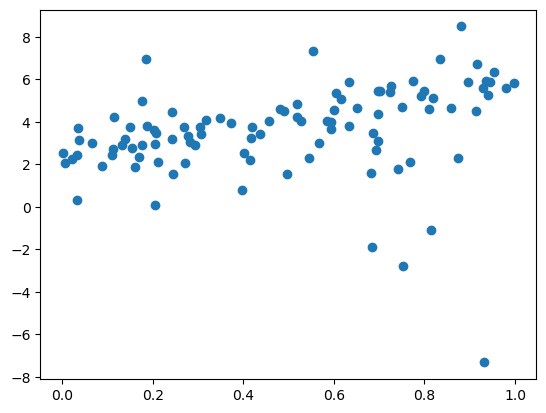

In [14]:
# This code just makes the data; don't worry about how it works!
true_weights = 4.0 # <-- pretend you didn't see this number.
true_bias = 2.0   # <-- this one too.

# Make the randomness consistent
torch.manual_seed(0)
# Use random x values
x = torch.rand(100, 1)
# Generate random noise, same shape as *x*, that has some outliers.
noise = torch.distributions.studentT.StudentT(2.0).sample(x.shape)
# For a simpler variant, use  torch.randn_like(x).
#print(f"Noise mean: {noise.mean()}, noise variance {noise.var()}")
# Generate true y values 
y_true = true_weights * x + noise + true_bias
# Make a scatterplot. The semicolon at the end says to ignore the return value.
plt.scatter(x, y_true);

In [23]:
class Linear:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def forward(self, x):
        return x @ self.weights + self.bias

layer = Linear(weights=torch.tensor([0.0]), bias=torch.tensor([0.0]))
layer.forward(x)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [22]:
@widgets.interact(bias=(-5.0, 5.0))
def plot_linreg(bias):
    layer.bias[0] = bias
    y_pred = layer.forward(x)
    plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');
    resid = 0.0 # TODO
    mse = 0.0 # TODO
    print(f"MSE: {mse}")

interactive(children=(FloatSlider(value=0.0, description='bias', max=5.0, min=-5.0), Output()), _dom_classes=(…

Bias that minimizes MSE: _____

### Gradient


In [ ]:
def linreg_mse(bias):
    ...

# test it out
linreg_mse(0.0)

In [ ]:
def compute_grad_wrt_bias(bias, eps = 1e-3):
    ...

# test it out.
compute_grad_wrt_bias(0.0)

### Gradient Descent